# Prétraiter et affiner les modèles basés sur des transformateurs

 #### 1. Bert vs XLM-RoBerta

 ##### **Différences entre BERT et XLM-RoBERTa**

BERT est un modèle bidirectionnel qui analyse le contexte d’un mot en regardant à gauche et à droite.

XLM-RoBERTa est une amélioration de RoBERTa, lui-même basé sur BERT, avec un pré-entraînement plus long et des stratégies d’apprentissage plus avancées.

* Gestion des séquences longues

     * BERT et XLM-RoBERTa ont une limite de 512 tokens, ce qui peut être un obstacle pour les longs textes.

     * Ils nécessitent des stratégies comme le truncation ou le windowing pour traiter les séquences longues.

* Support multilingue et pré-entraînement

     * BERT a été initialement entraîné sur des textes en anglais, bien qu’il existe une version multilingue (bert-multilingual-cased).

     * XLM-RoBERTa est entièrement multilingue, entraîné sur 100 langues sans nécessiter de modèles spécifiques.

     Son pré-entraînement repose sur une plus grande quantité de données, ce qui le rend plus performant pour le NLP multilingue.



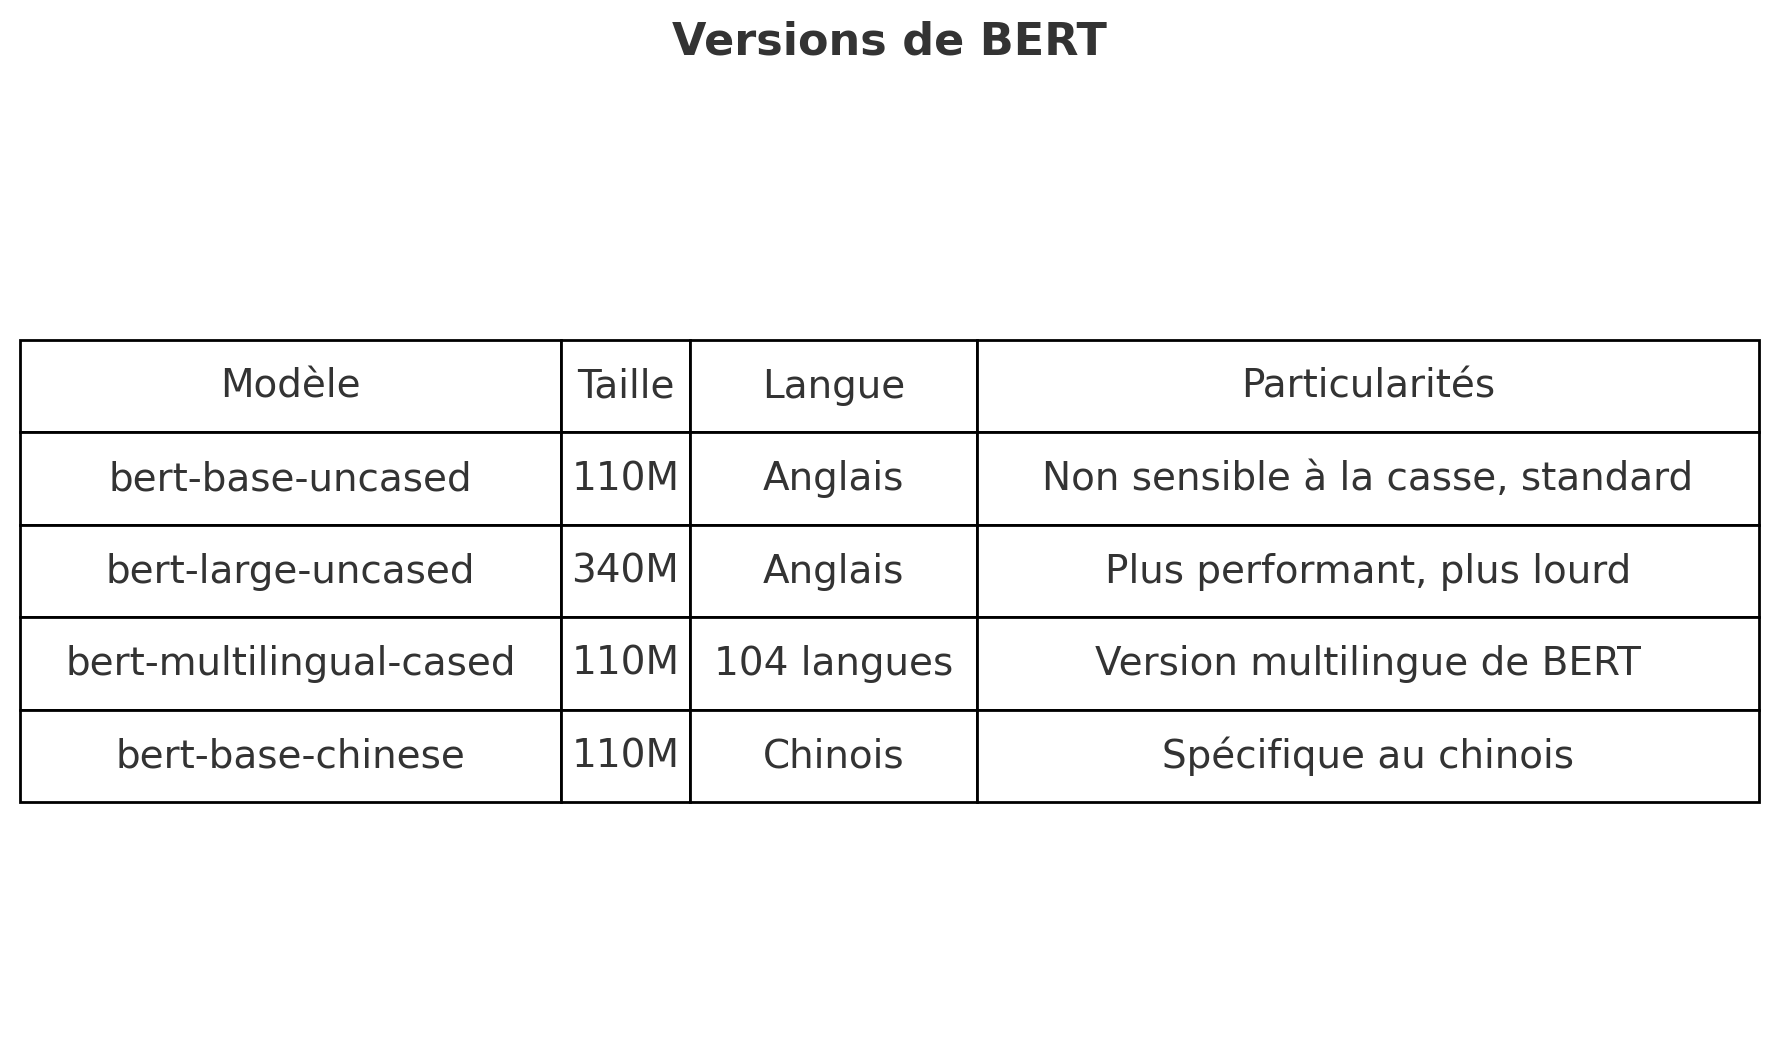

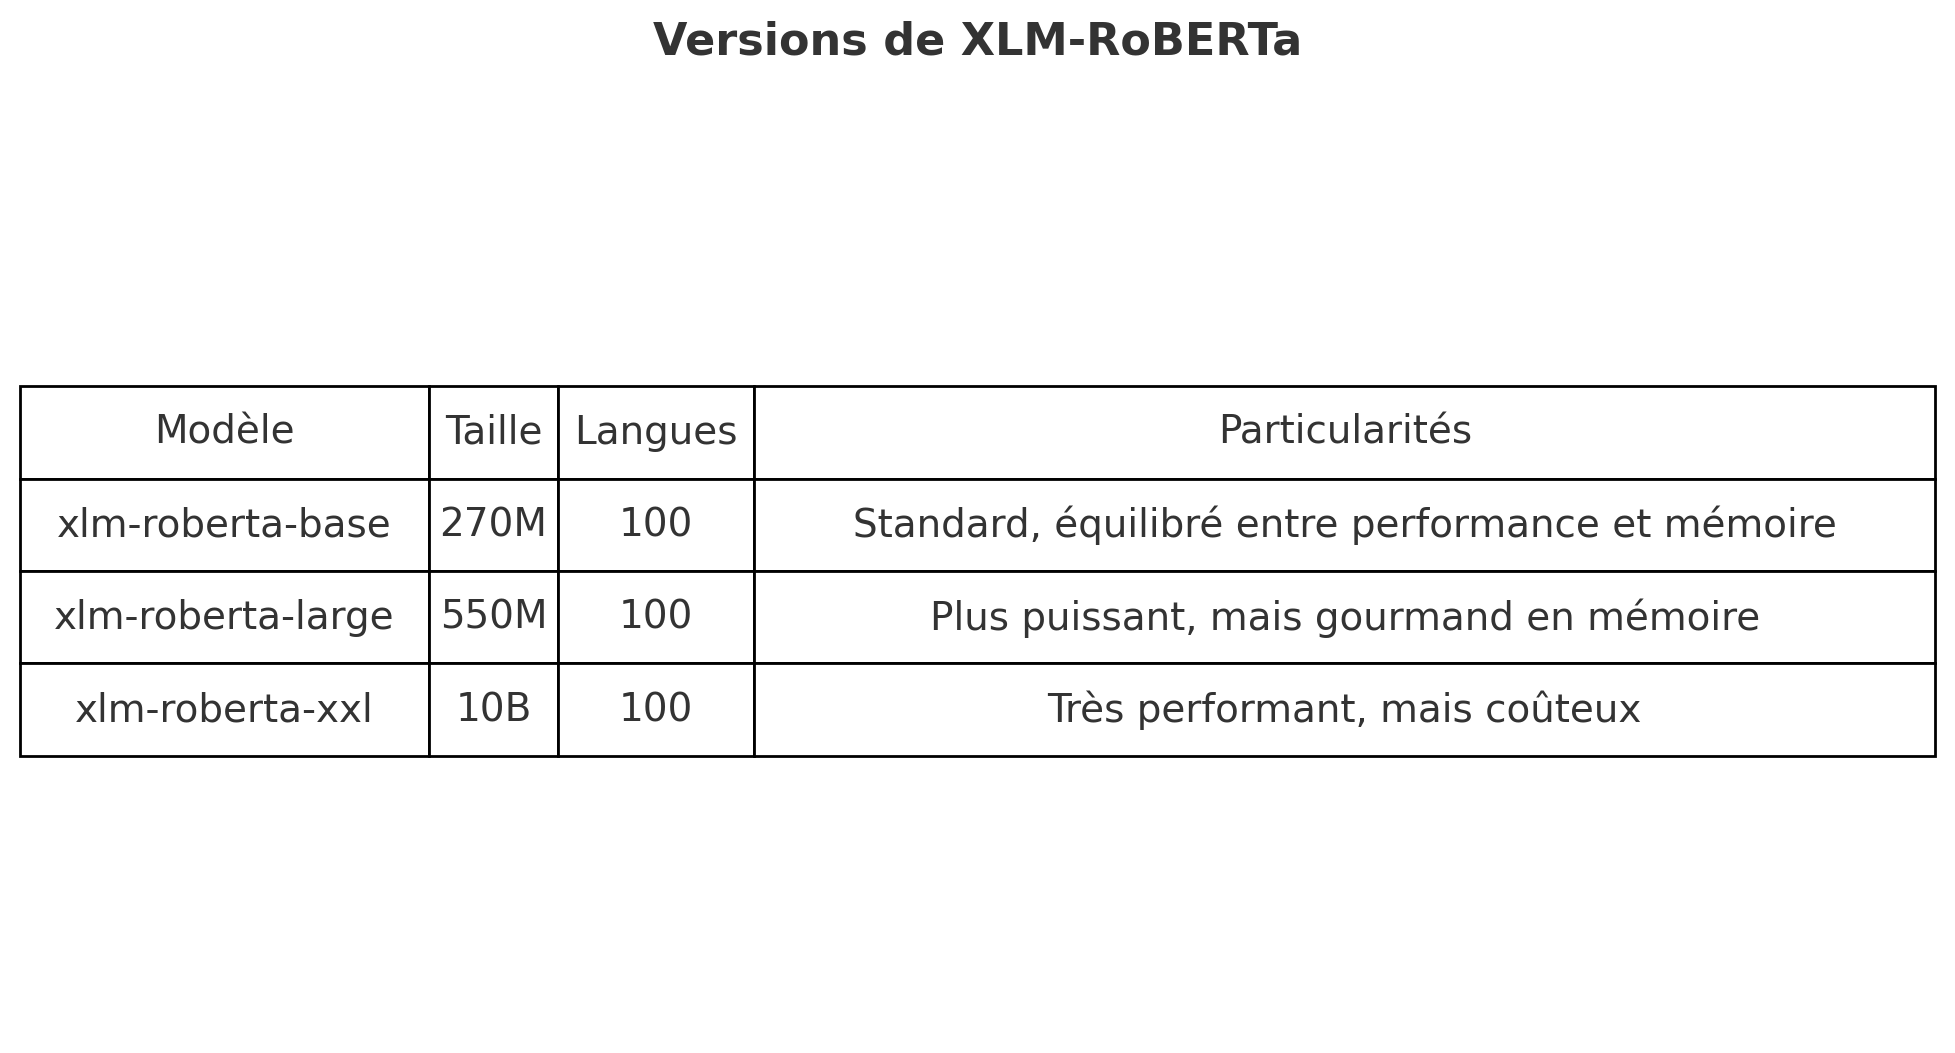

In [26]:
from IPython.display import display, Image

# Chemins des fichiers (à ajuster selon l'emplacement dans ton notebook Kaggle)
bert_image_path = "bert_versions.png"
xlm_roberta_image_path = "xlm_roberta_versions.png"

# Affichage des images
display(Image(bert_image_path))
display(Image(xlm_roberta_image_path))



In [12]:
from google.colab import files
files.upload()


Saving train.csv to train.csv


{'train.csv': b'id,premise,hypothesis,lang_abv,language,label\n5130fd2cb5,and these comments were considered in formulating the interim rules.,The rules developed in the interim were put together with these comments in mind.,en,English,0\n5b72532a0b,"These are issues that we wrestle with in practice groups of law firms, she said. ",Practice groups are not permitted to work on these issues.,en,English,2\n3931fbe82a,Des petites choses comme celles-l\xc3\xa0 font une diff\xc3\xa9rence \xc3\xa9norme dans ce que j\'essaye de faire.,J\'essayais d\'accomplir quelque chose.,fr,French,0\n5622f0c60b,you know they can\'t really defend themselves like somebody grown uh say my age you know yeah,They can\'t defend themselves because of their age.,en,English,0\n86aaa48b45,\xe0\xb9\x83\xe0\xb8\x99\xe0\xb8\x81\xe0\xb8\xb2\xe0\xb8\xa3\xe0\xb9\x80\xe0\xb8\xa5\xe0\xb9\x88\xe0\xb8\x99\xe0\xb8\x9a\xe0\xb8\x97\xe0\xb8\x9a\xe0\xb8\xb2\xe0\xb8\x97\xe0\xb8\xaa\xe0\xb8\xa1\xe0\xb8\xa1\xe0\xb8\xb8\xe0\xb8\x95\xe0

In [28]:
import pandas as pd
from transformers import BertTokenizer, XLMRobertaTokenizer


In [29]:
df = pd.read_csv('train.csv')
df.shape

(12120, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.3+ KB


In [17]:
df.sample(10)

id                                            premise  \
10305  62bf10780e                        种植园资本主义的结束可能像欧洲共产主义的消亡一样安全。   
10350  a866ad149f  ایف بی آئی کی تحقیقی رپورٹ‏، جینیفر اسٹینگل کا...   
4684   e409e70ada  Many lakes or sections of lakes are also wildl...   
1882   aa91d298b6  The man shifted slightly and cut the spear out...   
11222  2dc4f2a84c  In 1995 and again in 1998, the Legal Services ...   
8326   7931a6acc7  Life, unlike Reich's book, is not a series of ...   
10316  a0b267f191  El lago se encuentra a la sombra de varias mon...   
622    5659a75c20  My bottom line is that I would recommend the b...   
197    840da92d5e  A poll of Hong Kong residents finds them sangu...   
839    c84c340b30           هاه اه اه ليس منحدرا عبرنا سماء البلاد و   

                                              hypothesis lang_abv language  \
10305                                       欧洲的共产主义没有结束。       zh  Chinese   
10350  جینیفر سٹنگل کا ایف بی آئی کی طرف سے انٹرویو ک...       ur     Urdu   
4684   There are no lakes or lake sections that doubl...       en  English   
1882    The man watched motionlessly as the spear fell.        en  English   
11222  Low income persons have very difficult needs t...       en  English   
8326        Reich's book is a series of morality fables.       en  English   
10316  Algunas montañas, incluyendo el Scafell Pike, ...       es  Spanish   
622    I can't stomach this book, so I'm not going to...       en  English   
197    A poll of Hong Kong residents finds them more ...       en  English   
839                            نمتلك سموات تقطع البلدان.       ar   Arabic   

       label  
10305      2  
10350      0  
4684       2  
1882       2  
11222      1  
8326       0  
10316      2  
622        2  
197        1  
839        0

In [18]:
df["premise"].values

array(['and these comments were considered in formulating the interim rules.',
       'These are issues that we wrestle with in practice groups of law firms, she said. ',
       "Des petites choses comme celles-là font une différence énorme dans ce que j'essaye de faire.",
       ...,
       "The important thing is to realize that it's way past time to move it.",
       'At the west end is a detailed model of the whole temple complex.',
       'For himself he chose Atat??rk, or Father of the Turks.'],
      dtype=object)

In [38]:
df["hypothesis"].values

array(['The rules developed in the interim were put together with these comments in mind.',
       'Practice groups are not permitted to work on these issues.',
       "J'essayais d'accomplir quelque chose.", ...,
       'It cannot be moved, now or ever.',
       'The model temple complex is at the east end.',
       'Ataturk was the father of the Turkish nation.'], dtype=object)

In [39]:
df.isnull().sum()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

#### 2. Tokenisation du texte
Objectif : comprendre comment tokeniser du texte à l’aide de tokeniseurs pré-entraînés.

In [33]:
# Initialiser les tokenizers
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")  # Anglais uniquement
xlm_roberta_tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")  # Multilingue

# Fonction pour tokeniser les colonnes 'premise' et 'hypothesis'
def tokenize_texts(df, tokenizer, model_name, max_length=128):
    tokenized_data = tokenizer(
        df["premise"].tolist(),
        df["hypothesis"].tolist(),
        padding="max_length",  # Remplit les séquences plus courtes
        truncation=True,       # Coupe les séquences trop longues
        max_length=max_length, # Nombre max de tokens par phrase
        return_tensors="pt"    # Retourne les tenseurs PyTorch
    )

    # Création d'un DataFrame contenant les tokens et les masques d'attention
    tokenized_df = pd.DataFrame({
        "id": df["id"],  # Conserver l'ID original
        "input_ids": tokenized_data["input_ids"].tolist(),
        "attention_mask": tokenized_data["attention_mask"].tolist(),
        "label": df["label"],  # Ajouter la colonne de classification
        "model": model_name  # Indiquer le modèle utilisé
    })

    return tokenized_df


In [35]:
# Tokenisation avec BERT
bert_tokenized_df = tokenize_texts(df, bert_tokenizer, "BERT")

# Tokenisation avec XLM-RoBERTa
xlm_tokenized_df = tokenize_texts(df, xlm_roberta_tokenizer, "XLM-RoBERTa")



Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [36]:
# Décoder un exemple tokenisé avec BERT
sample_index = 0  # Modifier pour voir d'autres exemples
decoded_text = bert_tokenizer.decode(bert_tokenized_df["input_ids"][sample_index])

print("\n Texte décodé (BERT) :", decoded_text)



 Texte décodé (BERT) : [CLS] and these comments were considered in formulating the interim rules. [SEP] the rules developed in the interim were put together with these comments in mind. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


#### 3. Préparation des données d'entrée pour le modèle

Objectif : Formater correctement les données d'entrée pour les modèles de transformateurs.

In [41]:
# Vérification des tokens spéciaux et de la taille du vocabulaire pour BERT
print(" - Tokens spéciaux (BERT) :", bert_tokenizer.special_tokens_map)
print(" - Taille du vocabulaire (BERT) :", bert_tokenizer.vocab_size)

# Vérification ses tokenss spéciaux et de la taille du vocabulaire pour XLM-RoBERTa
print("\n - Tokenss spéciaux (XLM-RoBERTa) :", xlm_roberta_tokenizer.special_tokens_map)
print("   - Taille du vocabulaire (XLM-RoBERTa) :", xlm_roberta_tokenizer.vocab_size)


 - Tokens spéciaux (BERT) : {'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}
 - Taille du vocabulaire (BERT) : 30522

 - Tokenss spéciaux (XLM-RoBERTa) : {'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}
   - Taille du vocabulaire (XLM-RoBERTa) : 250002


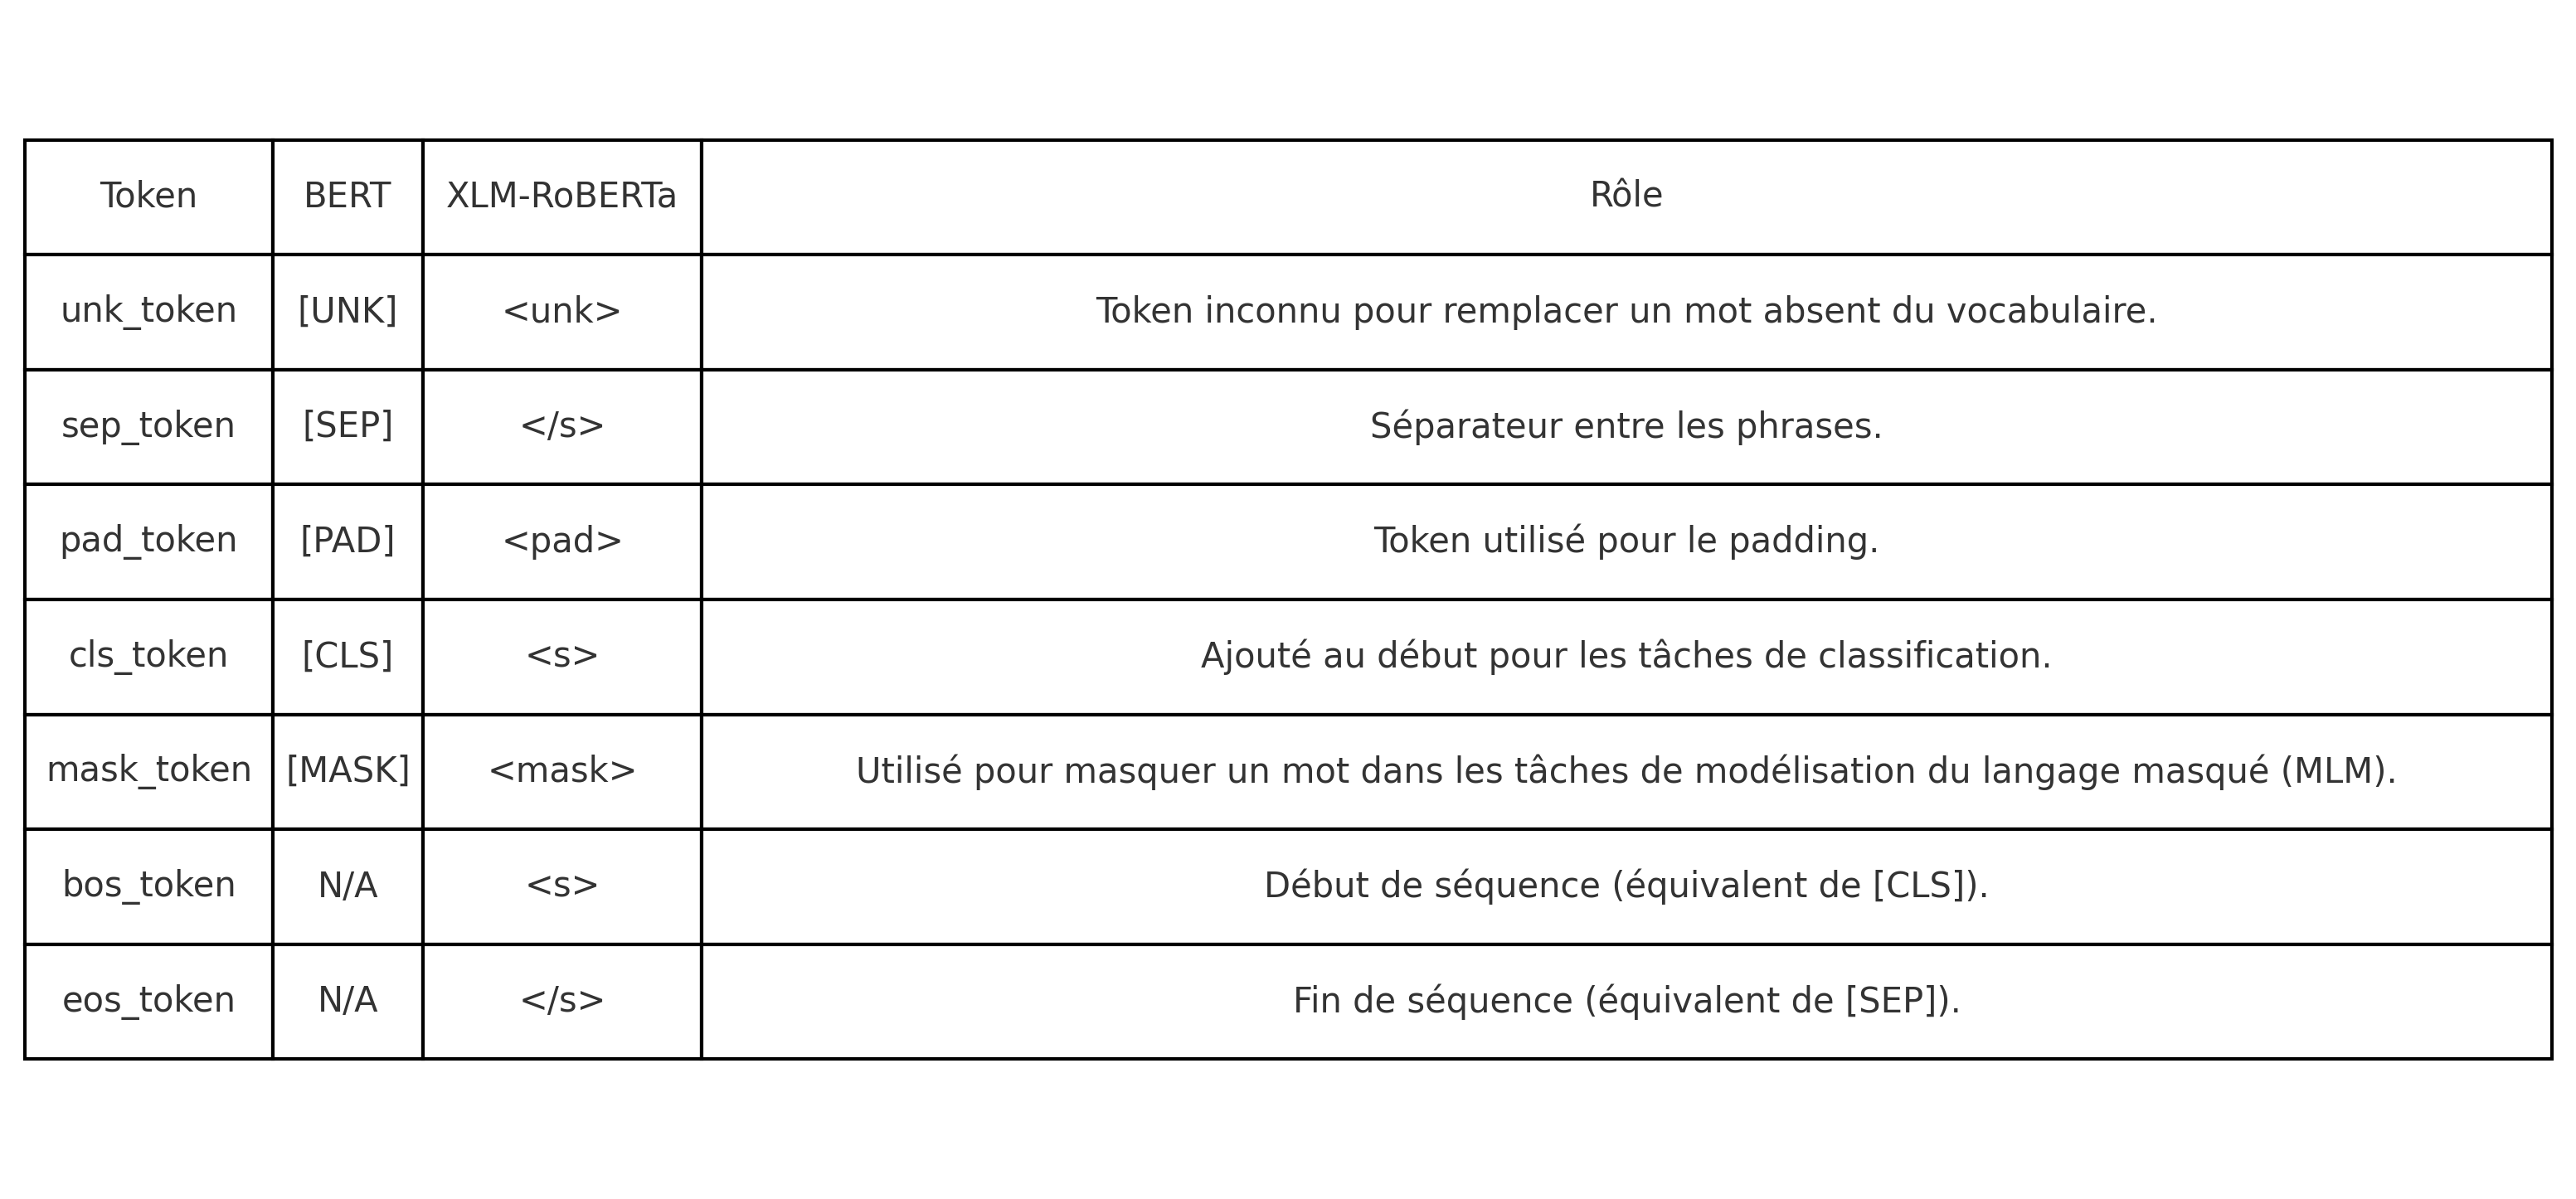

In [47]:
special_tokens_comparaison = "special_tokens_comparison.png"
display(Image(special_tokens_comparaison))


In [48]:
# Fonction pour formater les entrées
def format_inputs(df, tokenizer, model_name, max_length=128):
    formatted_data = []

    for premise, hypothesis in zip(df["premise"], df["hypothesis"]):
        # Tokenisation avec encode_plus()
        tokenized_output = tokenizer.encode_plus(
            premise,
            hypothesis,
            padding="max_length",   # Ajoute du padding
            truncation=True,        # Tronque si trop long
            max_length=max_length,  # Longueur max
            return_tensors="pt"     # Retourne un tenseur PyTorch
        )

        formatted_data.append({
            "input_ids": tokenized_output["input_ids"].tolist()[0],  # Liste des tokens
            "attention_mask": tokenized_output["attention_mask"].tolist()[0]  # Masque d'attention
        })

    # Convertir en DataFrame
    formatted_df = pd.DataFrame(formatted_data)
    formatted_df["model"] = model_name  # Ajouter le modèle utilisé

    return formatted_df

In [49]:
# Formater les entrées pour BERT
bert_inputs_df = format_inputs(df, bert_tokenizer, "BERT")

# Formater les entrées pour XLM-RoBERTa
xlm_inputs_df = format_inputs(df, xlm_roberta_tokenizer, "XLM-RoBERTa")


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [53]:
# Décoder un exemple tokenisé avec BERT
sample_index = 0  # Modifier pour voir d'autres exemples
decoded_text = bert_tokenizer.decode(bert_inputs_df["input_ids"][sample_index])

print("\n - Texte décodé (BERT) :", decoded_text)



 - Texte décodé (BERT) : [CLS] and these comments were considered in formulating the interim rules. [SEP] the rules developed in the interim were put together with these comments in mind. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


#### 4. Création de plis de validation croisée

In [50]:
from sklearn.model_selection import StratifiedKFold

# Définition du nombre de plis (k)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Création des listes pour stocker les indices des splits
train_splits = []
val_splits = []

# Application de StratifiedKFold sur le dataset
for train_idx, val_idx in skf.split(df, df["label"]):
    train_splits.append(train_idx)
    val_splits.append(val_idx)

# Affichage des tailles des ensembles après split
split_sizes = {
    "Pli": list(range(1, n_splits + 1)),
    "Taille Train": [len(train) for train in train_splits],
    "Taille Validation": [len(val) for val in val_splits],
}


In [52]:
# Création d'un DataFrame pour la visualisation
split_sizes_df = pd.DataFrame(split_sizes)
split_sizes_df.head()

Pli  Taille Train  Taille Validation
0    1          9696               2424
1    2          9696               2424
2    3          9696               2424
3    4          9696               2424
4    5          9696               2424